# 1. Loading data


In [1]:
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train = pd.read_csv('/kaggle/input/data-bounty-2-os-anomaly-detection/train.csv')
test = pd.read_csv('/kaggle/input/data-bounty-2-os-anomaly-detection/test.csv')
sample = pd.read_csv('/kaggle/input/data-bounty-2-os-anomaly-detection/submition_Sample.csv')

/kaggle/input/data-bounty-2-os-anomaly-detection/train.csv
/kaggle/input/data-bounty-2-os-anomaly-detection/test.csv
/kaggle/input/data-bounty-2-os-anomaly-detection/submition_Sample.csv


# 2. Exploratory Data Analysis

In [11]:
# Descriptive statisticts
print(train.info(), '\n')
print(train.describe(), '\n')
print(train.isnull().sum(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763144 entries, 0 to 763143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   processId        763144 non-null  int64
 1   threadId         763144 non-null  int64
 2   parentProcessId  763144 non-null  int64
 3   userId           763144 non-null  int64
 4   mountNamespace   763144 non-null  int64
 5   argsNum          763144 non-null  int64
 6   returnValue      763144 non-null  int64
 7   target           763144 non-null  int64
dtypes: int64(8)
memory usage: 46.6 MB
None 

           processId       threadId  parentProcessId         userId  \
count  763144.000000  763144.000000    763144.000000  763144.000000   
mean     6814.763308    6820.265241      1882.216609       2.279034   
std      1948.871187    1937.068333      2215.563094      37.416576   
min         1.000000       1.000000         0.000000       0.000000   
25%      7313.000000    7313.000000    

In [12]:
print(train.head(5))

   processId  threadId  parentProcessId  userId  mountNamespace  argsNum  \
0        381      7337                1     100      4026532231        5   
1        381      7337                1     100      4026532231        1   
2        381      7337                1     100      4026532231        0   
3       7347      7347             7341       0      4026531840        2   
4       7347      7347             7341       0      4026531840        4   

   returnValue  target  
0            0       1  
1            0       1  
2            0       1  
3           -2       1  
4            0       1  


In [13]:
# Unique values for each column
# -> just to see variety in data
for i in train.columns:
    print(i, np.unique(train[i]), '\n')

processId [   1    5    7    8   80   93  159  175  176  177  187  188  268  304
  305  306  307  377  378  379  380  381  382  383  384  482  483  484
  485  486  498  499  500  501  502  504  506  507  508  509  512  519
  522  526  714  715  716  717  812  813  822  823  837  838 1301 1312
 1318 1369 1378 1385 1631 1639 1640 1642 1648 1655 1661 1671 1672 1673
 1680 1687 1688 1689 2685 3338 4179 4193 7097 7099 7108 7114 7122 7128
 7146 7148 7152 7157 7163 7182 7185 7188 7193 7201 7241 7242 7243 7245
 7246 7247 7248 7249 7250 7251 7257 7258 7259 7260 7261 7262 7263 7264
 7265 7266 7267 7268 7269 7270 7271 7272 7273 7274 7275 7276 7277 7278
 7279 7280 7281 7282 7283 7284 7285 7286 7287 7288 7289 7290 7291 7292
 7293 7294 7295 7296 7297 7298 7299 7300 7301 7302 7303 7304 7305 7306
 7307 7308 7309 7310 7311 7312 7313 7314 7315 7316 7317 7318 7319 7320
 7321 7322 7323 7324 7325 7326 7327 7328 7329 7330 7331 7332 7333 7334
 7335 7336 7337 7338 7339 7340 7341 7342 7343 7344 7345 7346 7347 7

In [14]:
# Value counts - print relative proportion of values
for i in train.columns:
    print(i, train[i].value_counts(normalize=True), '\n')

processId processId
159     0.026885
1       0.021383
7373    0.009926
7371    0.009867
7374    0.008731
          ...   
176     0.000001
715     0.000001
1631    0.000001
813     0.000001
7157    0.000001
Name: proportion, Length: 545, dtype: float64 

threadId threadId
159     0.026759
1       0.021383
7373    0.009926
7371    0.009867
7374    0.008731
          ...   
1682    0.000001
813     0.000001
1654    0.000001
522     0.000001
7489    0.000001
Name: proportion, Length: 588, dtype: float64 

parentProcessId parentProcessId
187     0.160435
7099    0.087113
1       0.081766
1469    0.081602
188     0.078162
          ...   
7143    0.000001
7158    0.000001
7152    0.000001
7141    0.000001
7147    0.000001
Name: proportion, Length: 205, dtype: float64 

userId userId
0       0.989206
101     0.004453
109     0.001934
102     0.001583
100     0.001504
1000    0.001305
103     0.000014
Name: proportion, dtype: float64 

mountNamespace mountNamespace
4026531840    0.743629
4026

In [15]:
# Relative proportion of anomalous events' feature values
# -> see which variables are more common in anomalous events
anomalous = train[train["target"]==1]

for i in anomalous.columns:
    print(i, anomalous[i].value_counts(normalize=True), '\n')

processId processId
812     0.390859
822     0.195429
837     0.195429
7305    0.014184
7391    0.014184
7384    0.014184
379     0.014184
7353    0.014184
7342    0.014184
7348    0.014184
7439    0.014184
7352    0.011820
7437    0.011820
7304    0.011820
7382    0.011820
7340    0.011820
7347    0.011820
7389    0.011820
381     0.004728
378     0.004728
377     0.004728
502     0.002364
823     0.001576
519     0.000788
509     0.000788
838     0.000788
508     0.000788
813     0.000788
Name: proportion, dtype: float64 

threadId threadId
812     0.390859
822     0.195429
837     0.195429
7353    0.014184
7305    0.014184
7439    0.014184
7391    0.014184
7382    0.014184
7384    0.014184
7348    0.014184
7342    0.014184
7352    0.011820
7304    0.011820
7340    0.011820
7437    0.011820
7347    0.011820
7389    0.011820
7428    0.004728
502     0.002364
7423    0.002364
7643    0.002364
7427    0.002364
7356    0.002364
7375    0.002364
7413    0.002364
7367    0.002364
7395    0

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

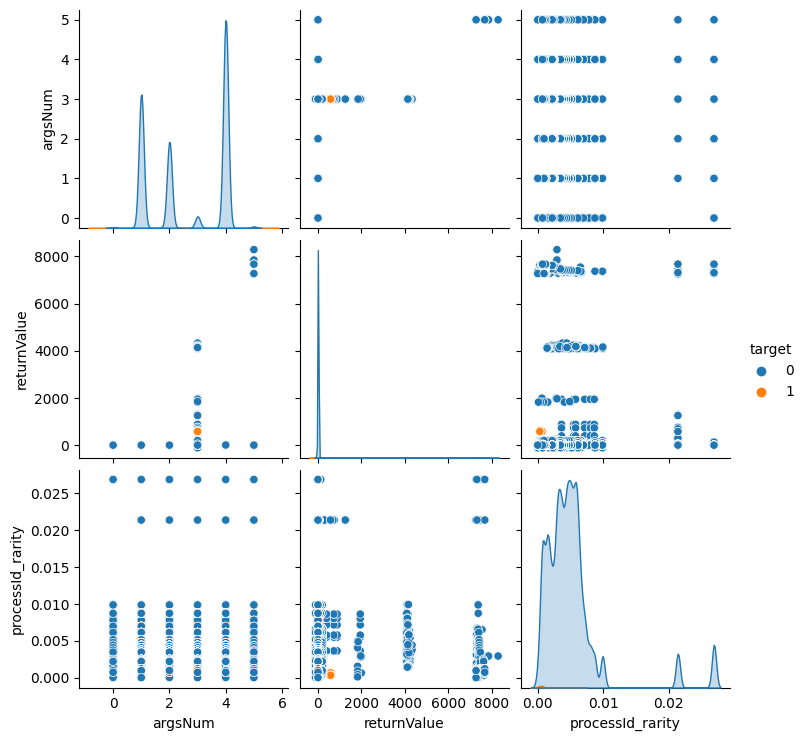

In [33]:
import seaborn as sns

#sns.scatterplot(data=train, x='argsNum', y='returnValue', hue='target')
sns.pairplot(tmp[['argsNum', 'returnValue', 'processId_rarity', 'target']], hue='target')

# 3. Feature engineering

In [18]:
# Map event frequency to values
tmp = train.copy()
for i in tmp.columns:
    event_freq = tmp[i].value_counts(normalize=True)
    tmp[f'{i}_rarity'] = tmp[i].map(event_freq)

# Assign '1' for negative returnValues
tmp['is_error'] = (tmp['returnValue'] < 0).astype(int)

#print(tmp)

In [4]:
print(train.columns)

Index(['processId', 'threadId', 'parentProcessId', 'userId', 'mountNamespace',
       'argsNum', 'returnValue', 'target'],
      dtype='object')


# 4. Trying out different models

## Creating train & test sets for supervised learning

In [19]:
# Original dataset
Y = train["target"].copy()
X = train.copy().drop(columns=["target"])

# Extended dataset with relative frequency values + 0/1 for negative/non-negative return values
Y_tmp = tmp["target"].copy()
X_tmp = tmp.copy().drop(columns=["target"])


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(X_tmp, Y_tmp, test_size=0.2)

#print(X.shape, Y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#print(Y.value_counts(), y_train.value_counts(), y_test.value_counts())

## Unsupervised methods
Isolation Forest, One-class SVM - just for fun

In [5]:
from sklearn.ensemble import IsolationForest

# Prediction with the original dataset
isolf_clf = IsolationForest(max_samples=100, random_state=42).fit(X_train)
isolf_ret = isolf_clf.predict(X_test)

# convert results from [-1,1] to [0,1]
isolf_ret = np.where(isolf_ret==-1, 0, isolf_ret)
print('Isolation Forest - OG\n','F1 score: ',f1_score(y_test, isolf_ret), 'Acc: ',accuracy_score(y_test, isolf_ret))

################ Prediction with the extended dataset
isolf_clf = IsolationForest(max_samples=100, random_state=42).fit(X_train_tmp)
isolf_ret = isolf_clf.predict(X_test_tmp)

# convert results from [-1,1] to [0,1]
isolf_ret = np.where(isolf_ret==-1, 0, isolf_ret)
print('Isolation Forest - ext\n','F1 score: ',f1_score(y_test_tmp, isolf_ret), 'Acc: ',accuracy_score(y_test_tmp, isolf_ret))

Isolation Forest - OG
 F1 score:  0.0 Acc:  0.2544208505591991
Isolation Forest - ext
 F1 score:  0.0 Acc:  0.27978955506489595


In [ ]:
from sklearn.svm import OneClassSVM

# Training dataset has to contain only 0 targets
ocsvm_df = train.copy()

# Preselecting only 0s and 1s
ocsvm_df_0 = ocsvm_df[ocsvm_df["target"]==0]
ocsvm_df_1 = ocsvm_df[ocsvm_df["target"]==1]

# Creating a train-test-split from only the 0 targets
Yocsvm = ocsvm_df_0["target"].copy()
Xocsvm = ocsvm_df_0.copy().drop(columns=["target"])
X_train_ocsvm, X_test_ocsvm, y_train_ocsvm, y_test_ocsvm = train_test_split(Xocsvm, Yocsvm, test_size=0.2)

# Appending 1s to test set
X_test_ocsvm = pd.concat([X_test_ocsvm, ocsvm_df_1.copy().drop(columns=["target"])], ignore_index=True)
y_test_ocsvm = pd.concat([y_test_ocsvm, ocsvm_df_1["target"].copy()], ignore_index=True)


# Prediction
ocsvm = OneClassSVM().fit(X_train_ocsvm)
ocsvm_ret = ocsvm.predict(X_train_ocsvm) # ...on training data without anomalies
print('One-Class SVM - train data\n','F1 score: ',f1_score(y_train_ocsvm, ocsvm_ret), 'Acc: ',accuracy_score(y_train_ocsvm, ocsvm_ret))

ocsvm_ret = ocsvm.predict(X_test_ocsvm) # ...on test data with anomalies
print('One-Class SVM - test data\n','F1 score: ',f1_score(y_test_ocsvm, ocsvm_ret), 'Acc: ',accuracy_score(y_test_ocsvm, ocsvm_ret))

## RandomForest / Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train, y_train) # OG data
dtree_ret = dtree_clf.predict(X_test)
print('Decision tree - OG\n','F1 score: ',f1_score(y_test, isolf_ret), 'Acc: ',accuracy_score(y_test, isolf_ret))


dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train_tmp, y_train_tmp) # Extended dataset
dtree_ret = dtree_clf.predict(X_test_tmp)
print('Decision tree - ext\n','F1 score: ',f1_score(y_test_tmp, isolf_ret), 'Acc: ',accuracy_score(y_test_tmp, isolf_ret))

Decision tree - OG
 F1 score:  0.0031122597553873035 Acc:  0.28227270046976655
Decision tree - ext
 F1 score:  0.0 Acc:  0.27978955506489595


## XGBoost

In [24]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train) # OG data
xgb_ret = xgb_clf.predict(X_test)
print('XGBoost - OG\n','F1 score: ',f1_score(y_test, xgb_ret), 'Acc: ',accuracy_score(y_test, xgb_ret))


xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_tmp, y_train_tmp) # Extended dataset
xgb_ret = xgb_clf.predict(X_test_tmp)
print('XGBoost - ext\n','F1 score: ',f1_score(y_test_tmp, xgb_ret), 'Acc: ',accuracy_score(y_test_tmp, xgb_ret))

XGBoost - OG
 F1 score:  0.972972972972973 Acc:  0.9999082743122212
XGBoost - ext
 F1 score:  1.0 Acc:  1.0


In [23]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, xgb_ret))
print("ROC AUC:", roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    152364
           1       1.00      0.95      0.97       265

    accuracy                           1.00    152629
   macro avg       1.00      0.98      0.99    152629
weighted avg       1.00      1.00      1.00    152629

ROC AUC: 0.9999900437036827


## LightGBM Classifier

In [28]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train) # OG data
lgbm_ret = lgbm_clf.predict(X_test)
print('LightGBM - OG\n','F1 score: ',f1_score(y_test, lgbm_ret), 'Acc: ',accuracy_score(y_test, lgbm_ret))


lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train_tmp, y_train_tmp) # Extended dataset
lgbm_ret = lgbm_clf.predict(X_test_tmp)
print('LightGBM - ext\n','F1 score: ',f1_score(y_test_tmp, lgbm_ret), 'Acc: ',accuracy_score(y_test_tmp, lgbm_ret))

[LightGBM] [Info] Number of positive: 1004, number of negative: 609511
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 610515, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001645 -> initscore=-6.408665
[LightGBM] [Info] Start training from score -6.408665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [26]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, lgbm_ret))
print("ROC AUC:", roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    152364
           1       0.41      0.38      0.39       265

    accuracy                           1.00    152629
   macro avg       0.70      0.69      0.70    152629
weighted avg       1.00      1.00      1.00    152629

ROC AUC: 0.6881915848987256


In [ ]:
# maybe add iso score as a feature - worst case scenario, it will be ignored
from sklearn.ensemble import IsolationForest

iso = IsolationForest(n_estimators=100)
train['iso_score'] = iso.fit_predict(train.drop(columns='target'))

# 5. Final model / (pre-)submission

[Fold 1/6]


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best threshold: 0.98 --> F1: 0.849
[Fold 2/6]


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best threshold: 0.99 --> F1: 0.898
[Fold 3/6]


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best threshold: 0.99 --> F1: 0.902
[Fold 4/6]


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best threshold: 0.97 --> F1: 0.799
[Fold 5/6]


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best threshold: 0.99 --> F1: 0.823
[Fold 6/6]


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best threshold: 0.74 --> F1: 0.896
Mean AUC over folds: 0.9999243394542449
Mean thresholds: 0.9438047138047138

Training final model with the selected threshold and hyperparameters


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Final test ROC AUC: 0.9998625342428443
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    190469
           1       0.41      1.00      0.58       317

    accuracy                           1.00    190786
   macro avg       0.70      1.00      0.79    190786
weighted avg       1.00      1.00      1.00    190786



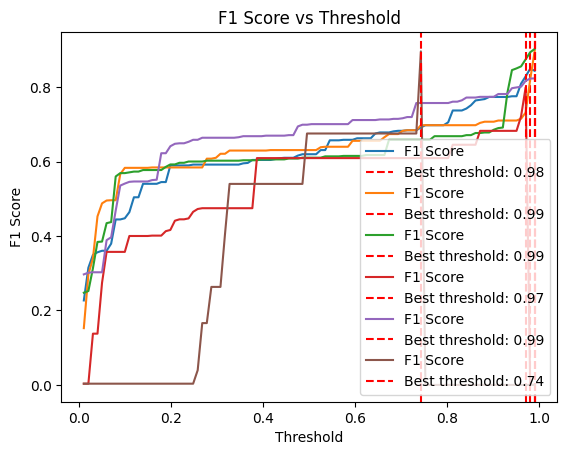

In [30]:
import matplotlib.pyplot as plt

def plot_auc(probs, y_val, roc_auc_calcd):
    from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

    # Caluclate: False Positive Ratio, True Positive Ratio, Precision and Recall
    fpr, tpr, _ = roc_curve(y_val, probs)
    precision, recall, _ = precision_recall_curve(y_val, probs)
    
    # ROC Curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid(True)
    plt.show()


def undersample_dataset(X_train, y_train):
    from sklearn.utils import resample
    
    # Concatenate training data before undersampling
    df_train = pd.concat([X_train, y_train], axis=1)
    
    # Separate normal and anomalies
    normal = df_train[df_train.target == 0]
    anomaly = df_train[df_train.target == 1]
    
    # Downsample normal entries only
    normal_down = resample(
        normal, 
        replace=False, 
        n_samples=len(anomaly)*5,  # (5:1 ratio)
        random_state=42
    )
    
    # Combine them back together, shuffle, then split again
    balanced_train = pd.concat([normal_down, anomaly]).sample(frac=1, random_state=42)
    X_balanced = balanced_train.drop("target", axis=1)
    y_balanced = balanced_train["target"]

    return X_balanced, y_balanced


def evaluate_thresholds(probs, y_val):
    from sklearn.metrics import f1_score, precision_recall_curve, roc_curve

    # Calculate F1 score at different thresholds
    thresholds = np.linspace(0.01, 0.99, 100)
    f1s = [f1_score(y_val, probs > t) for t in thresholds]

    # Get the threshold value that results in the best F1-score
    best_idx = np.argmax(f1s)
    best_threshold = thresholds[best_idx]
    
    plt.plot(thresholds, f1s, label="F1 Score")
    plt.axvline(best_threshold, color='r', linestyle='--', label=f"Best threshold: {best_threshold:.2f}")
    plt.xlabel("Threshold")
    plt.ylabel("F1 Score")
    plt.title("F1 Score vs Threshold")
    plt.legend()
    #plt.show()

    print(f"Best threshold: {best_threshold:.2f} --> F1: {f1s[best_idx]:.3f}")
    return best_threshold



from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import xgboost as xgb

# Split original data into a training and a test set (both are labeled, test data will be left untouched)
train_df, test_df = train_test_split(train, test_size=0.25, stratify=train["target"], random_state=42)

X = train_df.drop("target", axis=1)
y = train_df["target"]

# Create stratified folds from the training data only
splits=6
skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42) # shuffle because its not a time series data?

# Arrays for saving best scores from CV folds
auc_scores = []
thresholds = []

# CV + XGBoost for selecting the best threshold and model parameters
for fold, (train_idx, val_idx) in enumerate(skf.split(X,y)):
    print(f'[Fold %d/%d]' % (fold + 1, splits))

    # Select training and validation data based on the shuffled CV indices
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    X_val = X.iloc[val_idx]
    y_val = y.iloc[val_idx]

    # Undersampling
    X_train, y_train = undersample_dataset(X_train, y_train)

    # Calculate scale_pos_weight (hence our dataset is really-really unbalanced)
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    model = xgb.XGBClassifier(eval_metric='auc', scale_pos_weight=scale_pos_weight)
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        early_stopping_rounds=10,
        verbose=False
    )

    # Evaluation
    #preds = model.predict(X_val)
    probs = model.predict_proba(X_val)[:, 1]
    best_threshold = evaluate_thresholds(probs, y_val)
    
    auc = roc_auc_score(y_val, probs)
    #plot_auc(probs, y_val, auc)

    # Save scores
    aucs_scores.append(auc)
    thresholds.append(best_threshold)


print("Mean AUC over folds:", np.mean(aucs_scores))
print("Mean thresholds:", np.mean(thresholds))
print()




# Training final model with the selected threshold and hyperparameters
print("Training final model with the selected threshold and hyperparameters")

# Undersampling the full training dataset
X_us, y_us = undersample_dataset(X, y)

# splitting dataset for threshold tuning
X_tr_final, X_val_final, y_tr_final, y_val_final = train_test_split(X_us, y_us, test_size=0.2, stratify=y_us, random_state=42)

# Calculating scale_pos_weight
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

model = xgb.XGBClassifier(eval_metric='auc', scale_pos_weight=scale_pos_weight)
model.fit(
    X_tr_final, y_tr_final,
    eval_set=[(X_val_final, y_val_final)],
    early_stopping_rounds=10,
    verbose=False
)

# Finding best threshold
# probs = model.predict_proba(X_val_final)[:, 1]
# best_thrs = evaluate_thresholds(probs, y_val_final)

# evaluating performance on the left out test set with the new and final threshold
Xt = test_df.drop("target", axis=1)
yt = test_df["target"]

final_probs = model.predict_proba(Xt)[:, 1]
highest_threshold_idx = np.argmax(thresholds)
highest_threshold = thresholds[highest_threshold_idx]
final_preds = (final_probs > highest_threshold).astype(int)

from sklearn.metrics import classification_report, roc_auc_score
print("Final test ROC AUC:", roc_auc_score(yt, final_probs))
print(classification_report(yt, final_preds))

# Miscellaneous (earlier tries)

In [18]:
!pip install logmine

from logmine_pkg.log_mine import LogMine
from logmine_pkg.cli_input import Input

options = {
    'file': {'/kaggle/input/data-bounty-2-os-anomaly-detection/train.csv'},  # Replace with your actual log file
    'single_core': True,
    'max_dist': 0.3,
    'variables': {},
    'delimeters': r'\s+',
    'min_members': 2,
    'k1': 1,
    'k2': 1,
    'sorted': True,
    'number_align': False,
    'pattern_placeholder': '<*>',
    'mask_variables': False,
    'highlight_patterns': False,
    'highlight_variables': False
}
logmine = LogMine(
    # Processor config
    {k: options[k] for k in (
        'single_core',
    )},
    # Cluster config
    {k: options[k] for k in (
        'max_dist',
        'variables',
        'delimeters',
        'min_members',
        'k1',
        'k2',
    )},
    # Output config
    {k: options[k] for k in (
        'sorted',
        'number_align',
        'pattern_placeholder',
        'mask_variables',
        'highlight_patterns',
        'highlight_variables',
    )},
)

results = logmine.run(options['file'])


4 7347,7347,7341,0,4026531840,2,-2,1
2 7347,7347,7341,0,4026531840,4,0,1
2 7347,7347,7341,0,4026531840,4,3,1
3 7347,7347,7341,0,4026531840,2,0,1
2 7347,7347,7341,0,4026531840,1,0,1
4 7348,7348,7347,0,4026531840,2,0,1
2 7348,7348,7347,0,4026531840,3,0,1
3 7348,7348,7347,0,4026531840,4,0,1
3 7348,7348,7347,0,4026531840,4,3,1
3 7348,7348,7347,0,4026531840,1,0,1
4 7340,7340,7334,0,4026531840,2,-2,1
2 7340,7340,7334,0,4026531840,4,0,1
2 7340,7340,7334,0,4026531840,4,3,1
3 7340,7340,7334,0,4026531840,2,0,1
2 7340,7340,7334,0,4026531840,1,0,1
2 7342,7342,7340,0,4026531840,3,0,1
4 7342,7342,7340,0,4026531840,2,0,1
3 7342,7342,7340,0,4026531840,4,0,1
3 7342,7342,7340,0,4026531840,4,3,1
3 7342,7342,7340,0,4026531840,1,0,1
3 502,502,1,0,4026531840,2,0,1
4 7352,7352,7346,0,4026531840,2,-2,1
2 7352,7352,7346,0,4026531840,4,0,1
2 7352,7352,7346,0,4026531840,4,3,1
3 7352,7352,7346,0,4026531840,2,0,1
2 7352,7352,7346,0,4026531840,1,0,1
4 7353,7353,7352,0,4026531840,2,0,1
2 7353,7353,7352,0,4026531840,

array([[<Axes: xlabel='processId', ylabel='processId'>,
        <Axes: xlabel='threadId', ylabel='processId'>,
        <Axes: xlabel='parentProcessId', ylabel='processId'>,
        <Axes: xlabel='userId', ylabel='processId'>,
        <Axes: xlabel='mountNamespace', ylabel='processId'>,
        <Axes: xlabel='argsNum', ylabel='processId'>,
        <Axes: xlabel='returnValue', ylabel='processId'>,
        <Axes: xlabel='target', ylabel='processId'>],
       [<Axes: xlabel='processId', ylabel='threadId'>,
        <Axes: xlabel='threadId', ylabel='threadId'>,
        <Axes: xlabel='parentProcessId', ylabel='threadId'>,
        <Axes: xlabel='userId', ylabel='threadId'>,
        <Axes: xlabel='mountNamespace', ylabel='threadId'>,
        <Axes: xlabel='argsNum', ylabel='threadId'>,
        <Axes: xlabel='returnValue', ylabel='threadId'>,
        <Axes: xlabel='target', ylabel='threadId'>],
       [<Axes: xlabel='processId', ylabel='parentProcessId'>,
        <Axes: xlabel='threadId', ylabel

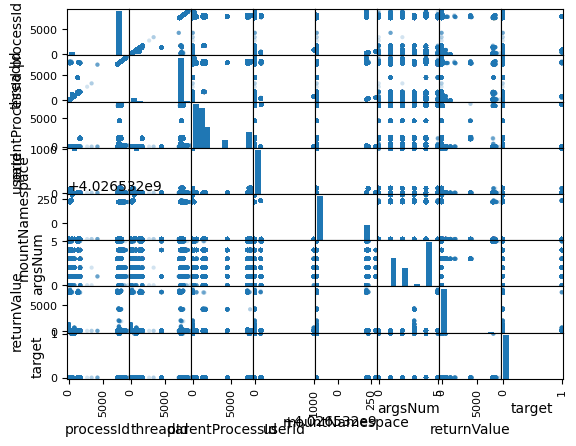

In [14]:
# Scatter matrix - output is way too small, takes too much time to execute
# -> was trying to see which values are overrepresented (eg. processes started by system at startup, etc)
pd.plotting.scatter_matrix(train, alpha=0.2)

In [10]:
copyy = anomalous.copy()
col = 'userId'
#event_freq = copyy[col].value_counts(normalize=True)
copyy = copyy.groupby('userId').value_counts(normalize=True)
#copyy['event_rarity'] = copyy[col].map(event_freq)
#copyy.sort_values(by=col, ascending=False, inplace=True)
print(copyy)

userId  processId  threadId  parentProcessId  mountNamespace  argsNum  returnValue  target
0       7304       7304      7298             4026531840      2        -2           1         0.016878
        7305       7305      7304             4026531840      2         0           1         0.016878
        7340       7340      7334             4026531840      2        -2           1         0.016878
        7342       7342      7340             4026531840      2         0           1         0.016878
        7347       7347      7341             4026531840      2        -2           1         0.016878
                                                                                                ...   
1000    837        837       1                4026531840      0         0           1         0.001004
                                                              3         232         1         0.001004
                                                                        608         1